# import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings, time
from sklearn import metrics
import json
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

# Load data

In [2]:
training_data = pd.read_json('test.json',encoding="utf8",orient='columns')

In [3]:
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
training_data['name_verification'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)            
training_data['screen_name_verification'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_verification'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)

## let's look at the data

In [4]:
training_data

,bot,coordinates_count,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_count,...,retweeteds_percent,screen_name,sources_count,statuses_count,tweets_per_day,user_id,verified,name_verification,screen_name_verification,description_verification
0,1,1,2015-11-20 18:53:22,True,False,"On hiatus • Inspired by the smart, funny folks...",0,1080,0,1,...,0.000000,mattlieberisbot,2,1164,1.356643,4303727112,False,True,True,True
1,1,1,2015-02-25 20:11:25,True,True,,0,84,0,1,...,0.000000,sc_papers,1,1380,1.192740,3063139353,False,True,True,False
2,1,1,2015-01-01 17:44:39,False,False,Inspiring cooks everywhere since 1956.,193,13,1367,1,...,1.000000,lucarivera16,1,224,0.232365,2955142070,False,False,False,True
3,1,1,2017-03-13 22:53:29,True,False,Just a guy trying to do good by telling everyo...,5,25,308,1,...,0.000000,dantheimprover,1,66,1.137931,841421989302697985,False,False,False,True
4,1,1,2014-05-07 22:29:25,False,False,bot by @rubicon,0,173,0,1,...,0.000000,_all_of_us_,1,6068,14.210773,2482834658,False,True,False,True
5,1,1,2015-06-18 22:07:31,True,False,[Bot rolled up by @BeachEpisode] Cataloguing e...,25,8538,2,1,...,0.035000,KatamariItems,3,2736,3.432873,3333573622,False,False,False,True
6,1,1,2015-01-25 17:34:58,False,False,Twitterbot for #Autophagy papers. Curated by @...,25,467,0,1,...,0.000000,AutophagyPapers,1,13668,11.505051,2996105102,False,True,True,True
7,1,1,2015-07-07 15:23:47,True,False,,0,115,3,1,...,0.000000,HSC_papers,1,4195,4.092683,3271095818,False,False,True,False
8,1,1,2014-08-08 20:23:08,False,False,cheese cheese cheese // updates every 4 hours ...,0,50,1,1,...,0.000000,everycheese,1,111,2.134615,2717905134,False,True,True,True
9,1,1,2014-09-22 09:46:36,True,True,"Literature bot searching arXiv, biorXiv, PeerJ...",0,6,0,1,...,0.000000,gyr_papers,1,333,0.254393,2826073429,False,True,True,True


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1880 entries, 0 to 1879
Data columns (total 28 columns):
bot                         1880 non-null int64
coordinates_count           1880 non-null int64
created_at                  1880 non-null datetime64[ns]
default_profile             1880 non-null bool
default_profile_image       1880 non-null bool
description                 1880 non-null object
favourites_count            1880 non-null int64
followers_count             1880 non-null int64
friends_count               1880 non-null int64
geo_count                   1880 non-null int64
has_extended_profile        1880 non-null bool
languages_count             1880 non-null int64
listed_count                1880 non-null int64
location                    1880 non-null object
name                        1880 non-null object
neg_tweets                  1880 non-null float64
neu_tweets                  1880 non-null float64
pos_tweets                  1880 non-null float64
retweeteds_per

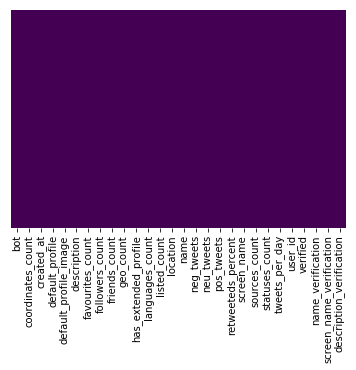

In [6]:
%matplotlib inline
sns.heatmap(training_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
bots = training_data[training_data.bot==1]
nonbots = training_data[training_data.bot==0]

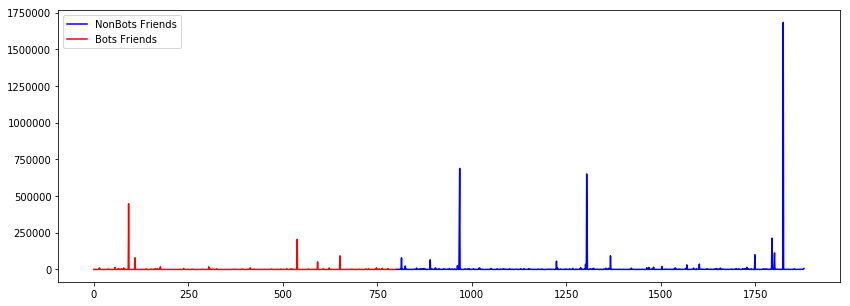

In [8]:
bots_listed_count_df = bots[bots.listed_count<10000]
nonbots_listed_count_df = nonbots[nonbots.listed_count<10000]

bots_verified_df = bots_listed_count_df[bots_listed_count_df.verified==False]
bots_screenname_has_bot_df_ = bots_verified_df[(bots_verified_df.screen_name.str.contains("bot", case=False)==True)].shape

plt.figure(figsize=(14,5))
plt.plot(nonbots_listed_count_df.friends_count, color='blue', label='NonBots Friends')
plt.plot(bots_listed_count_df.friends_count, color='red', label='Bots Friends')
#plt.hist(nonbots_listed_count_df.friends_count, color='blue', label='NonBots Friends')
plt.legend(loc='upper left')

plt.show()

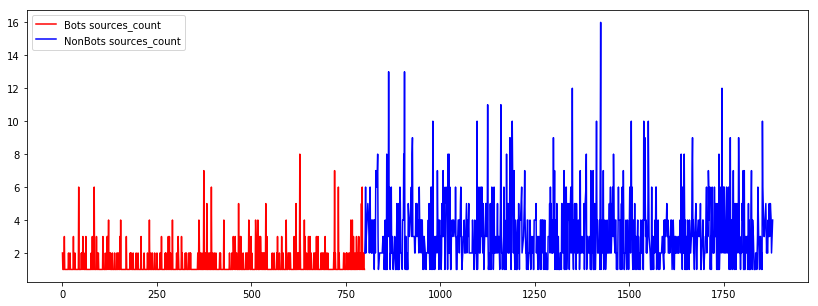

In [9]:
plt.figure(figsize=(14,5))

plt.plot(bots_listed_count_df.sources_count, color='red', label='Bots sources_count')
plt.plot(nonbots_listed_count_df.sources_count, color='blue', label='NonBots sources_count')
plt.legend(loc='upper left')
plt.show()

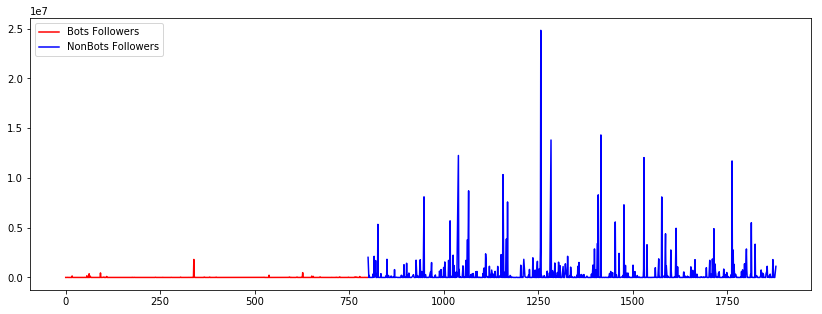

In [10]:
plt.figure(figsize=(14,5))
plt.plot(bots_listed_count_df.followers_count, color='red', label='Bots Followers')
plt.plot(nonbots_listed_count_df.followers_count, color='blue', label='NonBots Followers')
plt.legend(loc='upper left')
plt.show()

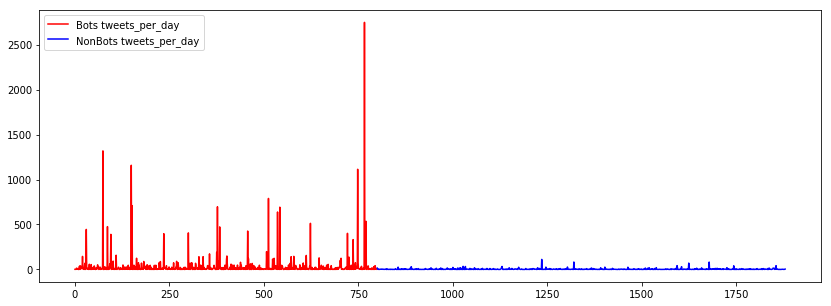

In [11]:
plt.figure(figsize=(14,5))

plt.plot(bots_listed_count_df.tweets_per_day, color='red', label='Bots tweets_per_day')
plt.plot(nonbots_listed_count_df.tweets_per_day, color='blue', label='NonBots tweets_per_day')
plt.legend(loc='upper left')
plt.show()

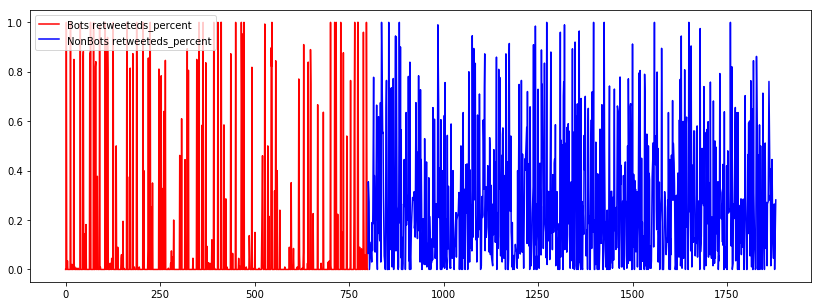

In [12]:
plt.figure(figsize=(14,5))
plt.plot(bots_listed_count_df.retweeteds_percent, color='red', label='Bots retweeteds_percent')
plt.plot(nonbots_listed_count_df.retweeteds_percent, color='blue', label='NonBots retweeteds_percent')
plt.legend(loc='upper left')
plt.show()

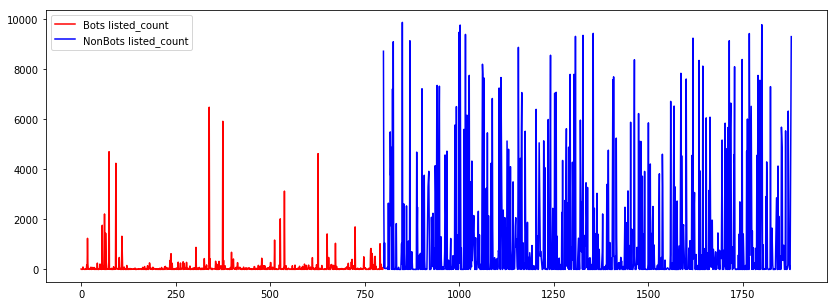

In [13]:
plt.figure(figsize=(14,5))
plt.plot(bots_listed_count_df.listed_count, color='red', label='Bots listed_count')
plt.plot(nonbots_listed_count_df.listed_count, color='blue', label='NonBots listed_count')
plt.legend(loc='upper left')
plt.show()

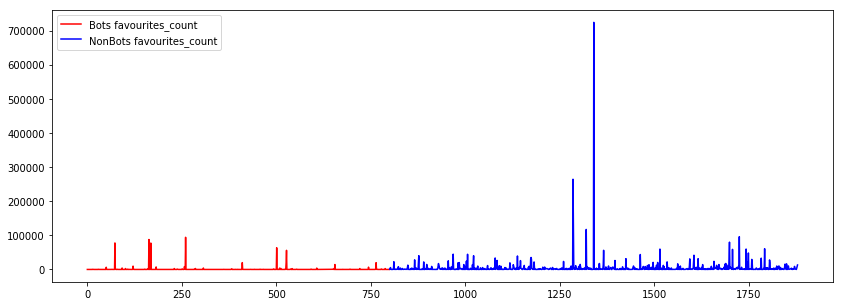

In [14]:
plt.figure(figsize=(14,5))
plt.plot(bots_listed_count_df.favourites_count, color='red', label='Bots favourites_count')
plt.plot(nonbots_listed_count_df.favourites_count, color='blue', label='NonBots favourites_count')
plt.legend(loc='upper left')
plt.show()

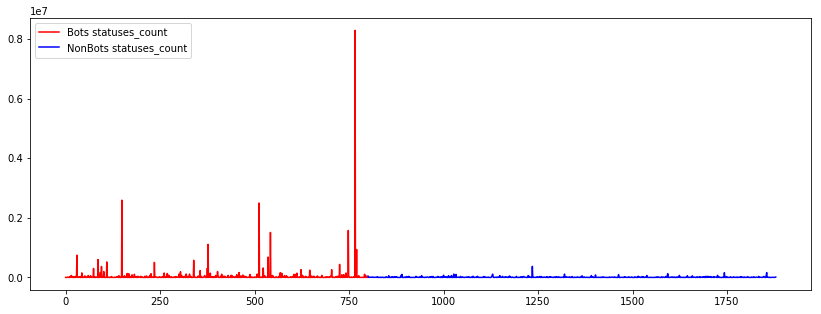

In [15]:
plt.figure(figsize=(14,5))
plt.plot(bots_listed_count_df.statuses_count, color='red', label='Bots statuses_count')
plt.plot(nonbots_listed_count_df.statuses_count, color='blue', label='NonBots statuses_count')
plt.legend(loc='upper left')
plt.show()

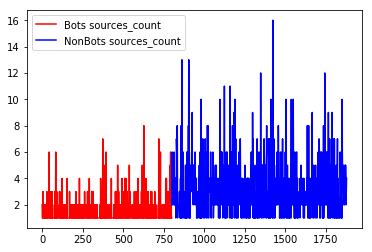

In [16]:
plt.plot(bots_listed_count_df.sources_count, color='red', label='Bots sources_count')
plt.plot(nonbots_listed_count_df.sources_count, color='blue', label='NonBots sources_count')
plt.legend(loc='upper left')
plt.show()

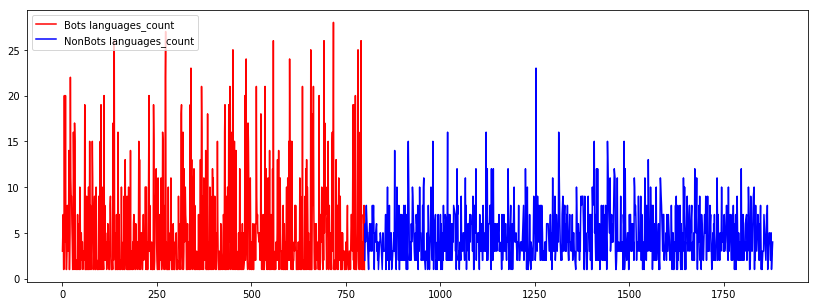

In [17]:
plt.figure(figsize=(14,5))
plt.plot(bots_listed_count_df.languages_count, color='red', label='Bots languages_count')
plt.plot(nonbots_listed_count_df.languages_count, color='blue', label='NonBots languages_count')
plt.legend(loc='upper left')
plt.show()

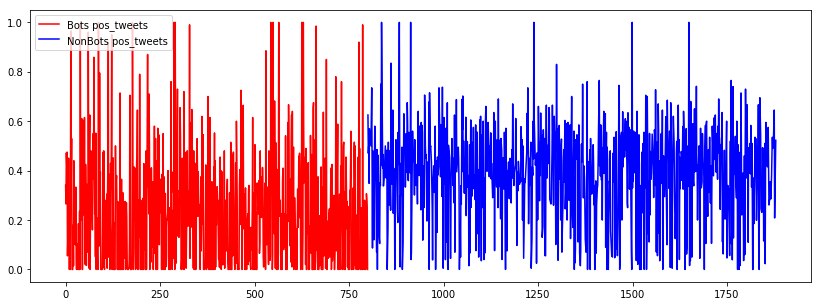

In [18]:
plt.figure(figsize=(14,5))
plt.plot(bots_listed_count_df.pos_tweets, color='red', label='Bots pos_tweets')
plt.plot(nonbots_listed_count_df.pos_tweets, color='blue', label='NonBots pos_tweets')
plt.legend(loc='upper left')
plt.show()

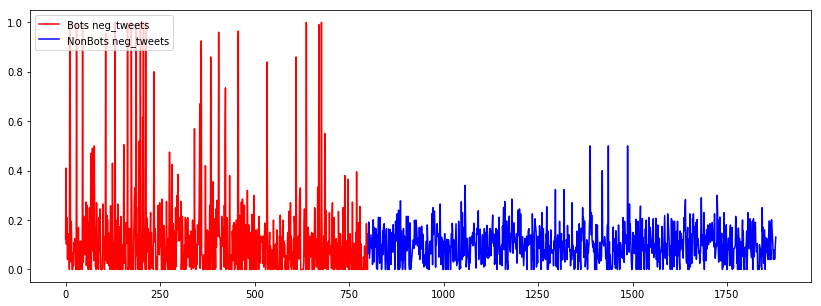

In [19]:
plt.figure(figsize=(14,5))
plt.plot(bots_listed_count_df.neg_tweets, color='red', label='Bots neg_tweets')
plt.plot(nonbots_listed_count_df.neg_tweets, color='blue', label='NonBots neg_tweets')
plt.legend(loc='upper left')
plt.show()

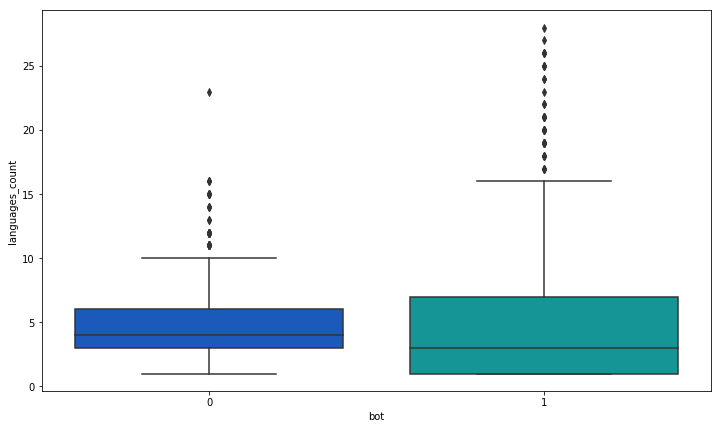

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='bot',y='languages_count',data=training_data,palette='winter')

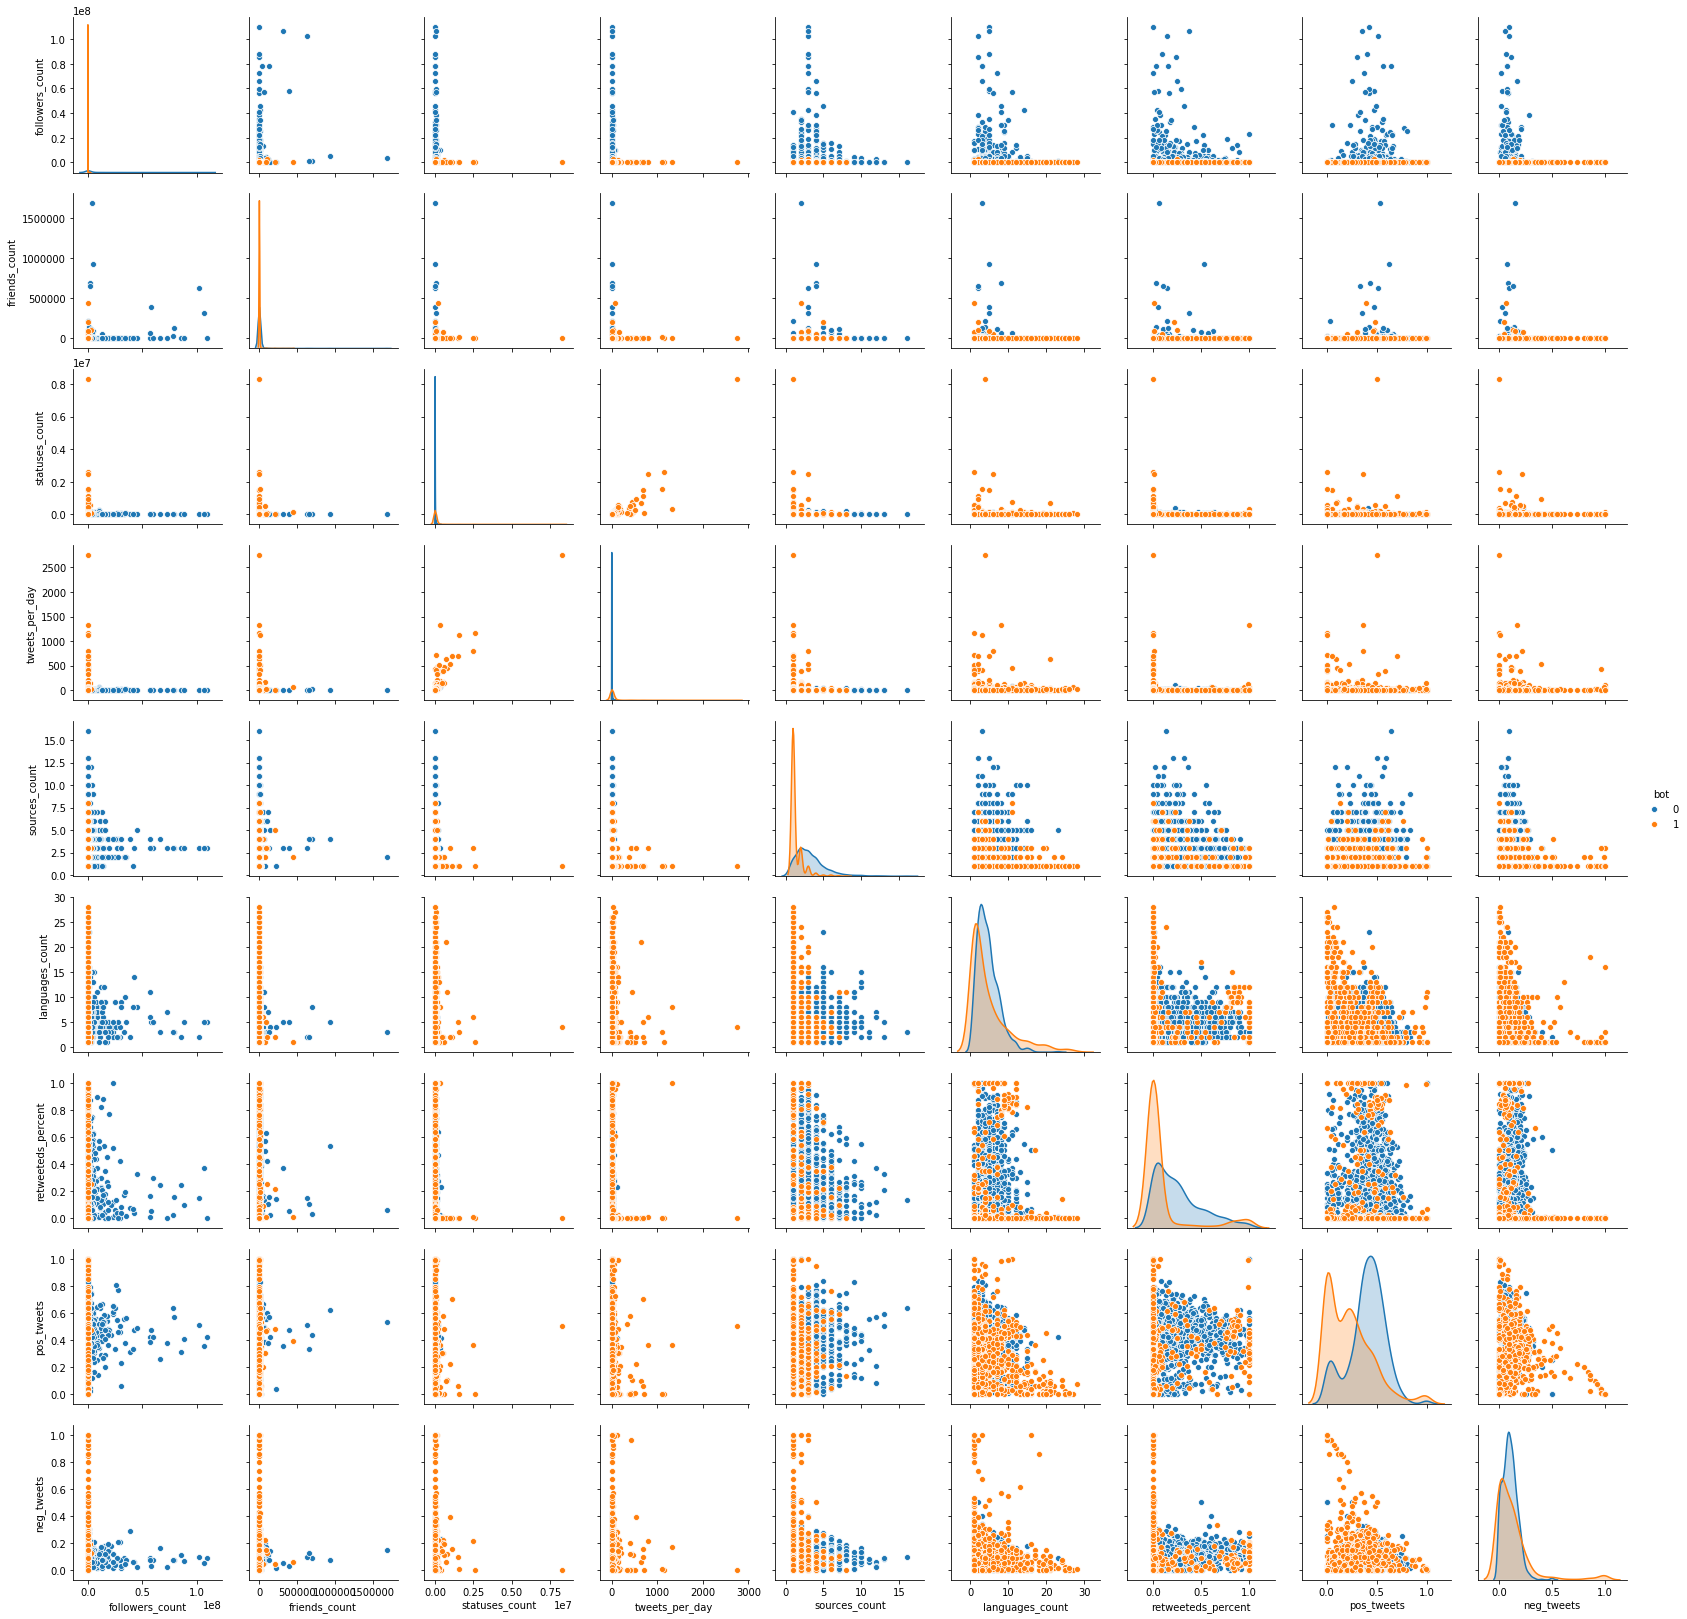

In [21]:
sns.pairplot(training_data, hue= 'bot', vars = [ 'followers_count','friends_count', 'statuses_count','tweets_per_day','sources_count','languages_count','retweeteds_percent','pos_tweets','neg_tweets'])

# correlation

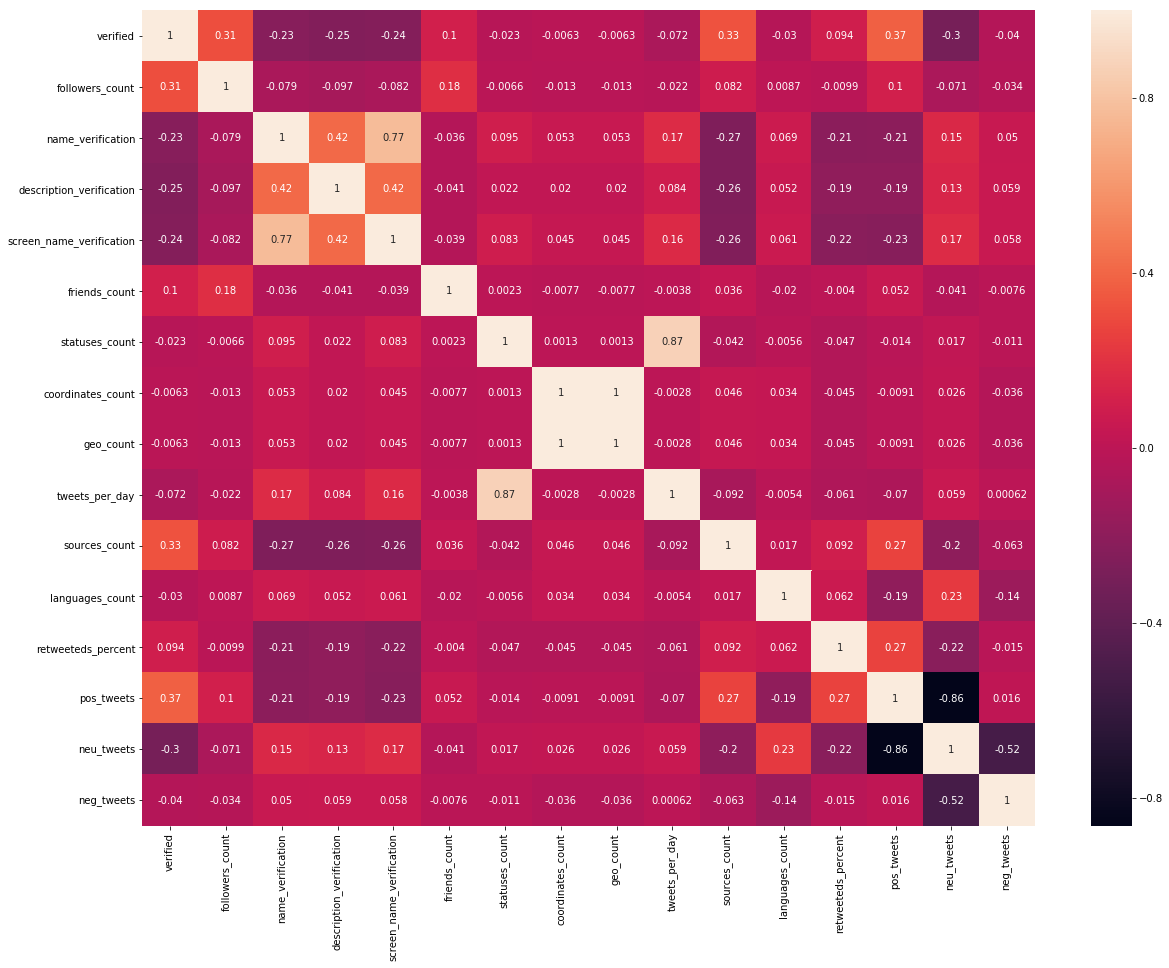

In [25]:
features_ = ['verified', 'followers_count','name_verification','description_verification', 
             'screen_name_verification','friends_count', 
             'statuses_count','coordinates_count','geo_count','tweets_per_day','sources_count',
             'languages_count','retweeteds_percent','pos_tweets','neu_tweets','neg_tweets']
X = training_data[features_]
cor = training_data[features_]
plt.subplots(figsize=(20,15))
sns.heatmap(X.corr(), annot=True)


## scaling

In [26]:
features = ['verified', 'followers_count','name_verification','description_verification', 'screen_name_verification','friends_count', 'statuses_count','coordinates_count','geo_count','tweets_per_day','sources_count','languages_count','retweeteds_percent','pos_tweets','neu_tweets','neg_tweets']
X = training_data[features]
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, training_data.bot, random_state=0)
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis=0)
# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение
# обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train


### 1) KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print("Accuracy on the training sample: {:.3f}".format(
 knn.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(knn.score(X_test_scaled, y_test)))

Accuracy on the training sample: 0.909
Accuracy on the test sample: 0.872


In [28]:
pred = knn.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))


[[232  23]
 [ 37 178]]


In [29]:
from sklearn.metrics import cohen_kappa_score
cohen_score = cohen_kappa_score(y_test, pred)
cohen_score

0.7414978458153818

In [30]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       255
           1       0.89      0.83      0.86       215

   micro avg       0.87      0.87      0.87       470
   macro avg       0.87      0.87      0.87       470
weighted avg       0.87      0.87      0.87       470



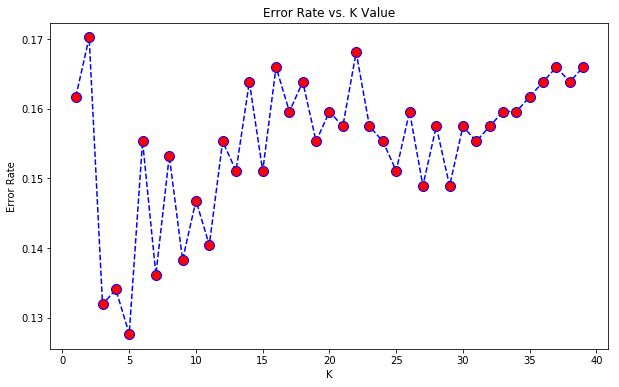

In [31]:
error_rate = []
X_train = X_train_scaled
X_test = X_test_scaled
# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

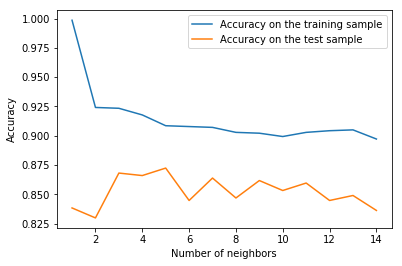

In [32]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 15)
for n_neighbors in neighbors_settings:
 # строим модель
     clf = KNeighborsClassifier(n_neighbors=n_neighbors)
     clf.fit(X_train_scaled, y_train)
     # записываем правильность на обучающем наборе
     training_accuracy.append(clf.score(X_train_scaled, y_train))
     # записываем правильность на тестовом наборе
     test_accuracy.append(clf.score(X_test_scaled, y_test))
plt.plot(neighbors_settings, training_accuracy, label="Accuracy on the training sample")
plt.plot(neighbors_settings, test_accuracy, label="Accuracy on the test sample")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend()
plt.show()

### 2)Логистическая регрессия

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
logreg = LogisticRegression().fit(X_train_scaled, y_train)
print("Accuracy on the training sample: {:.3f}".format(
 logreg.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(logreg.score(X_test_scaled, y_test)))


Accuracy on the training sample: 0.877
Accuracy on the test sample: 0.838


c:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


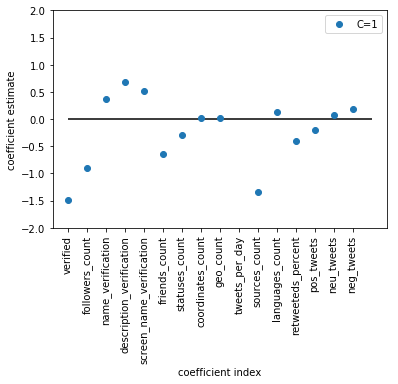

In [34]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.xticks(range(X.shape[1]), X, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.ylim(-2, 2)
plt.xlabel("coefficient index")
plt.ylabel("coefficient estimate")
plt.legend()
plt.show()

c:\python\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
No handles with labels found to put in legend.


Accuracy with C=100.000: 0.88
Accuracy with C=100.000: 0.85


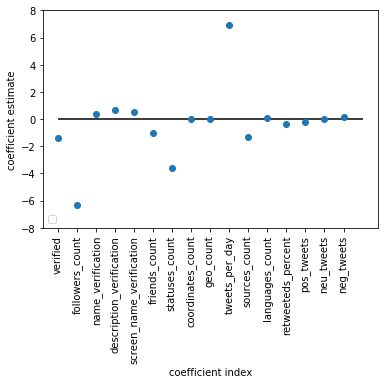

In [35]:
for C, marker in zip([100], ['o']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train_scaled, y_train)
    print("Accuracy with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_train_scaled, y_train)))
    print("Accuracy with C={:.3f}: {:.2f}".format(
    C, lr_l1.score(X_test_scaled, y_test)))
plt.plot(lr_l1.coef_.T, marker)
plt.xticks(range(X.shape[1]), X, rotation=90)
plt.hlines(0, 0, X.shape[1])
plt.xlabel("coefficient index")
plt.ylabel("coefficient estimate")
plt.ylim(-8, 8)
plt.legend(loc=3)
plt.show()

In [36]:
pred1 = logreg.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred1))

[[224  31]
 [ 45 170]]


In [37]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       255
           1       0.85      0.79      0.82       215

   micro avg       0.84      0.84      0.84       470
   macro avg       0.84      0.83      0.84       470
weighted avg       0.84      0.84      0.84       470



In [38]:
cohen_score = cohen_kappa_score(y_test, pred1)
cohen_score

0.672563938032817

### 3) Дерево принятия решений

In [39]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train_scaled, y_train)
print("Accuracy on the training sample: {:.3f}".format(
 tree.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(tree.score(X_test_scaled, y_test)))


Accuracy on the training sample: 0.928
Accuracy on the test sample: 0.849


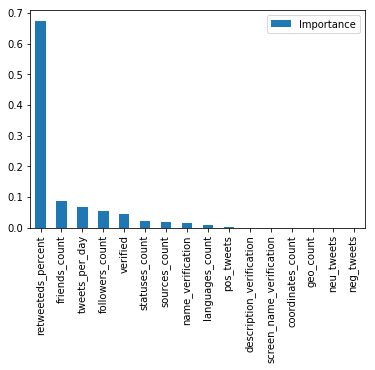

In [40]:
import pandas as pd
feature_importances = pd.DataFrame(tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['Importance']).sort_values('Importance',ascending=False)
feature_importances.plot(kind='bar')
plt.show()

In [41]:
pred2 = tree.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred2))

[[225  30]
 [ 41 174]]


In [42]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       255
           1       0.85      0.81      0.83       215

   micro avg       0.85      0.85      0.85       470
   macro avg       0.85      0.85      0.85       470
weighted avg       0.85      0.85      0.85       470



In [43]:
cohen_score = cohen_kappa_score(y_test, pred2)
cohen_score

0.6944419009248237

### 4)SVM

In [44]:
from sklearn.svm import SVC
s = SVC(kernel='linear')
s.fit(X_train_scaled, y_train)
print("Accuracy on the training sample: {:.3f}".format(s.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(s.score(X_test_scaled, y_test)))
#C - ошыбка выхода на гиперплоскость
#гамма - кривизна гипfffrfrfrfrfrfrfrff  f  ff f f ffr ffrffrv frvfrffffrfrffrfrff

Accuracy on the training sample: 0.877
Accuracy on the test sample: 0.853


In [45]:
predictions = s.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[231  24]
 [ 45 170]]


In [46]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       255
           1       0.88      0.79      0.83       215

   micro avg       0.85      0.85      0.85       470
   macro avg       0.86      0.85      0.85       470
weighted avg       0.85      0.85      0.85       470



In [47]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(kernel='linear'),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

c:\python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.674468085106383, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6872340425531915, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6617021276595745, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8489361702127659, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8531914893617021, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.8723404255319149, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .............................

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8723404255319149, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8851063829787233, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.8638297872340426, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8191489361702128, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8446808510638298, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.8382978723404255, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.8404255319148937, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf 

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    3.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [33]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [34]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [35]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[234  21]
 [ 35 180]]


In [36]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       255
           1       0.90      0.84      0.87       215

   micro avg       0.88      0.88      0.88       470
   macro avg       0.88      0.88      0.88       470
weighted avg       0.88      0.88      0.88       470



## Random Forest

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=20)
rf = rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)
print("Accuracy on the training sample: %.5f" %accuracy_score(y_train, y_pred_train))
print("Accuracy on the test sample: %.5f" %accuracy_score(y_test, y_pred_test))

Accuracy on the training sample: 0.88511
Accuracy on the test sample: 0.84681


c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in vers

c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in vers

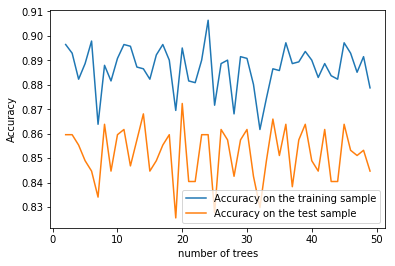

max Accuracy:  0.87234


In [51]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
rtree_settings = range(2, 50)
for min_samples_split in rtree_settings:
 # строим модель
     rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=min_samples_split)
     rf.fit(X_train, y_train)
     # записываем правильность на обучающем наборе
     training_accuracy.append(rf.score(X_train, y_train))
     # записываем правильность на тестовом наборе
     test_accuracy.append(rf.score(X_test, y_test))
plt.plot(rtree_settings, training_accuracy, label="Accuracy on the training sample")
plt.plot(rtree_settings, test_accuracy, label="Accuracy on the test sample")
plt.ylabel("Accuracy")
plt.xlabel("number of trees")
plt.legend()
plt.show()
print("max Accuracy:  %.5f" %max(test_accuracy))

c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in vers

c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in vers

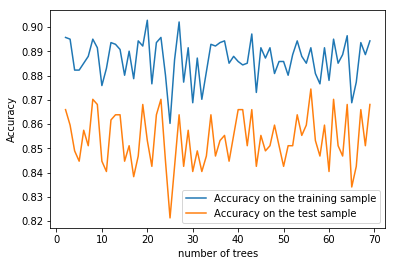

0.874468085106383


In [52]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
rtree_settings = range(2, 70)
for min_samples_split in rtree_settings:
 # строим модель
    rf = RandomForestClassifier(criterion='entropy', min_samples_leaf=100, min_samples_split=min_samples_split)
    rf.fit(X_train_scaled, y_train)
 # записываем правильность на обучающем наборе
    training_accuracy.append(rf.score(X_train_scaled, y_train))
 # записываем правильность на тестовом наборе
    test_accuracy.append(rf.score(X_test_scaled, y_test))
plt.plot(rtree_settings, training_accuracy, label="Accuracy on the training sample")
plt.plot(rtree_settings, test_accuracy, label="Accuracy on the test sample")
plt.ylabel("Accuracy")
plt.xlabel("number of trees")
plt.legend()
plt.show()
print(max(test_accuracy))

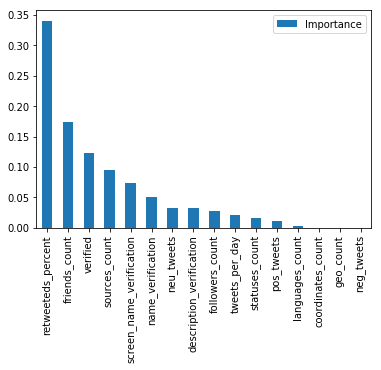

In [53]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['Importance']).sort_values('Importance',ascending=False)
feature_importances.plot(kind='bar')
plt.show()

In [54]:
pred3 = rf.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred3))

[[235  20]
 [ 42 173]]


In [55]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       255
           1       0.90      0.80      0.85       215

   micro avg       0.87      0.87      0.87       470
   macro avg       0.87      0.86      0.87       470
weighted avg       0.87      0.87      0.87       470



In [56]:
cohen_score = cohen_kappa_score(y_test, pred3)
cohen_score

0.7320952468511538

# AdaBoost

In [57]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state=0)
clf.fit(X_train_scaled, y_train)
print("Accuracy on the training sample: {:.3f}".format(
clf.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(clf.score(X_test_scaled, y_test)))

Accuracy on the training sample: 0.930
Accuracy on the test sample: 0.877


In [58]:
pred4 = clf.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred4))



[[235  20]
 [ 38 177]]


In [59]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       255
           1       0.90      0.82      0.86       215

   micro avg       0.88      0.88      0.88       470
   macro avg       0.88      0.87      0.87       470
weighted avg       0.88      0.88      0.88       470



In [121]:
cohen_score = cohen_kappa_score(y_test, pred4)
cohen_score 

0.749747544294501

# GradientBoosting

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train_scaled, y_train)

print("Accuracy on the training sample: {:.3f}".format(gbrt.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(gbrt.score(X_test_scaled, y_test)))

Accuracy on the training sample: 0.972
Accuracy on the test sample: 0.879


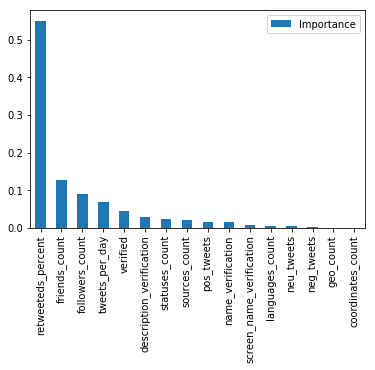

In [61]:
import pandas as pd
feature_importances = pd.DataFrame(gbrt.feature_importances_,
                                   index = X_train.columns,
                                    columns=['Importance']).sort_values('Importance',ascending=False)
feature_importances.plot(kind='bar')
plt.show()

# MLP

In [62]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
print("Accuracy on the training sample: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on the test sample: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on the training sample: 0.92
Accuracy on the test sample: 0.88


c:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [63]:
# вычисляем среднее для каждого признака обучающего набора
mean_on_train = X_train.mean(axis=0)
# вычисляем стандартное отклонение для каждого признака обучающего набора
std_on_train = X_train.std(axis=0)
# вычитаем среднее и затем умножаем на обратную величину стандартного отклонения
# mean=0 и std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# используем ТО ЖЕ САМОЕ преобразование (используем среднее и стандартное отклонение
# обучающего набора) для тестового набора
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on the training sample: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Точність на навчальній вибірці: 0.918
Точність на тестовій вибірці: 0.879


c:\python\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [64]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=0, hidden_layer_sizes=(2,))
mlp.fit(X_train_scaled, y_train)

print("Accuracy on the training sample: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on the training sample: 0.877
Accuracy on the test sample: 0.836


In [69]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on the training sample: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on the training sample: 0.926
Accuracy on the test sample: 0.883


In [70]:
pred5 = mlp.predict(X_test_scaled)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred5))

[[236  19]
 [ 36 179]]


In [71]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       255
           1       0.90      0.83      0.87       215

   micro avg       0.88      0.88      0.88       470
   macro avg       0.89      0.88      0.88       470
weighted avg       0.88      0.88      0.88       470



In [72]:
cohen_score = cohen_kappa_score(y_test, pred5)
cohen_score


0.7627787464439754

In [73]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on the training sample: {:.3f}".format(
 mlp.score(X_train_scaled, y_train)))
print("Accuracy on the test sample: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on the training sample: 0.886
Accuracy on the test sample: 0.849


In [74]:
training_data.tweets_per_day[i]

1.975609756097561

In [77]:
bag_of_words_bot = r'bot|b0t|cannabis|tweet me|mishear|follow me|updates every|gorilla|yes_ofc|forget' \
                    r'expos|kill|clit|bbb|butt|fuck|XXX|sex|truthe|fake|anony|free|virus|funky|RNA|kuck|jargon' \
                    r'nerd|swag|jack|bang|bonsai|chick|prison|paper|pokem|xx|freak|ffd|dunia|clone|genie|bbb' \
                    r'ffd|onlyman|emoji|joke|troll|droop|free|every|wow|cheese|yeah|bio|magic|wizard|face'
training_data['name_verification'] = training_data.name.str.contains(bag_of_words_bot, case=False, na=False)            
training_data['screen_name_verification'] = training_data.screen_name.str.contains(bag_of_words_bot, case=False, na=False)
training_data['description_verification'] = training_data.description.str.contains(bag_of_words_bot, case=False, na=False)
y = []
i=0
h=0
while i < 1518:
    if training_data.tweets_per_day[i]> 7.7 :

        if training_data.retweeteds_percent[i] > 0.85:
            a_0 = 0.25
        else:
            if  training_data.retweeteds_percent[i] == 0:
                a_0 = 0.4
                if training_data.tweets_per_day[i] > 20:
                    a_0 = 0.5
            else:
                a_0 = training_data.tweets_per_day[i]/100
 
            if training_data.tweets_per_day[i] > 25:
                a_0 = 0.5
    else:
        if training_data.retweeteds_percent[i] > 0.9:
            a_0 = 0.25
        else:
            if  training_data.retweeteds_percent[i] == 0:
                a_0 = 0.2
            else:
                a_0 = 0
                
    if training_data.verified[i] == True:
        a_1 = -1
    else:
        a_1 = 0
    #if training_data.default_profile[i] == True:
    #a_2 = 0.3
####################################################################    
    if training_data.languages_count[i] > 4:
        a_3 = 0.05
        if training_data.languages_count[i] > 5:
            a_3 = 0.1
            if training_data.languages_count[i] > 6:
                a_3 = 0.15
                if training_data.languages_count[i] >7:
                    a_3 = 0.25
                    if training_data.languages_count[i] > 9:
                        a_3 = 0.4            
    else:
        a_3 = 0
        
    if training_data.sources_count[i] >= 3:
        a_4 = 0
        if training_data.sources_count[i] >= 4:
            a_4 = - 0.1
            if training_data.sources_count[i] >= 5:
                a_4 = -0.3
            

    else:
        if training_data.sources_count[i] == 2:
            a_4 = 0.1
        else:
            a_4 = 0.2
        
###########################################################        
    if training_data.friends_count[i] == 0:
        if training_data.followers_count[i] > 100:
            a_5 = 0.4
            if training_data.followers_count[i] > 10000:
                a_5 = 0.5
        else:
            if training_data.followers_count[i]<10:
                a_5 = 0
    else:
        if training_data.friends_count[i]< training_data.followers_count[i]/100:
            a_5 = 0.25
        else:
            a_5 = 0
#############################################333333333333333333333
    if training_data.name_verification[i] == True:
        a_6 = 0.2
        if training_data.screen_name_verification[i] == True:
            a_6 = 0.4
            if training_data.description_verification[i] == True:
                a_6 = 0.5
        else:
            if training_data.description_verification[i] == True:
                a_6 = 0.4
    else:
        if training_data.screen_name_verification[i] == True:
            a_6 = 0.2
            if training_data.description_verification[i] == True:
                a_6 = 0.4
        else:
            if training_data.description_verification[i] == True:
                a_6 = 0.2   
            else:
                a_6 = 0
###################################################################3333333      
    if training_data.pos_tweets[i]> 0.1:
        a_7 = 0
        if training_data.pos_tweets[i]> 0.8:
            a_7 = 0.1
    else:
        a_7 = 0.1
    if training_data.neg_tweets[i] == 1:
        if training_data.statuses_count[i] != 1:
            a_8 = 0
##############################
    c = a_0 + a_1 + a_3 + a_4 + a_5 + a_6 + a_7 
    #print(c)
    if c >= 0.5:
        y.append(1)
        h=h+1
    else:
        y.append(0)
    i = i+1
#print (y)
#print (h)
#print (h/1518)
j=0
z = 0
# while j< 1879:
#     if y[j] == training_data.bot[j]:
#         z = z + 1
#     j=j+1

#print(z/1879)

    
        


#### 